In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
from PIL import Image
from yolov5 import utils
import yolov5

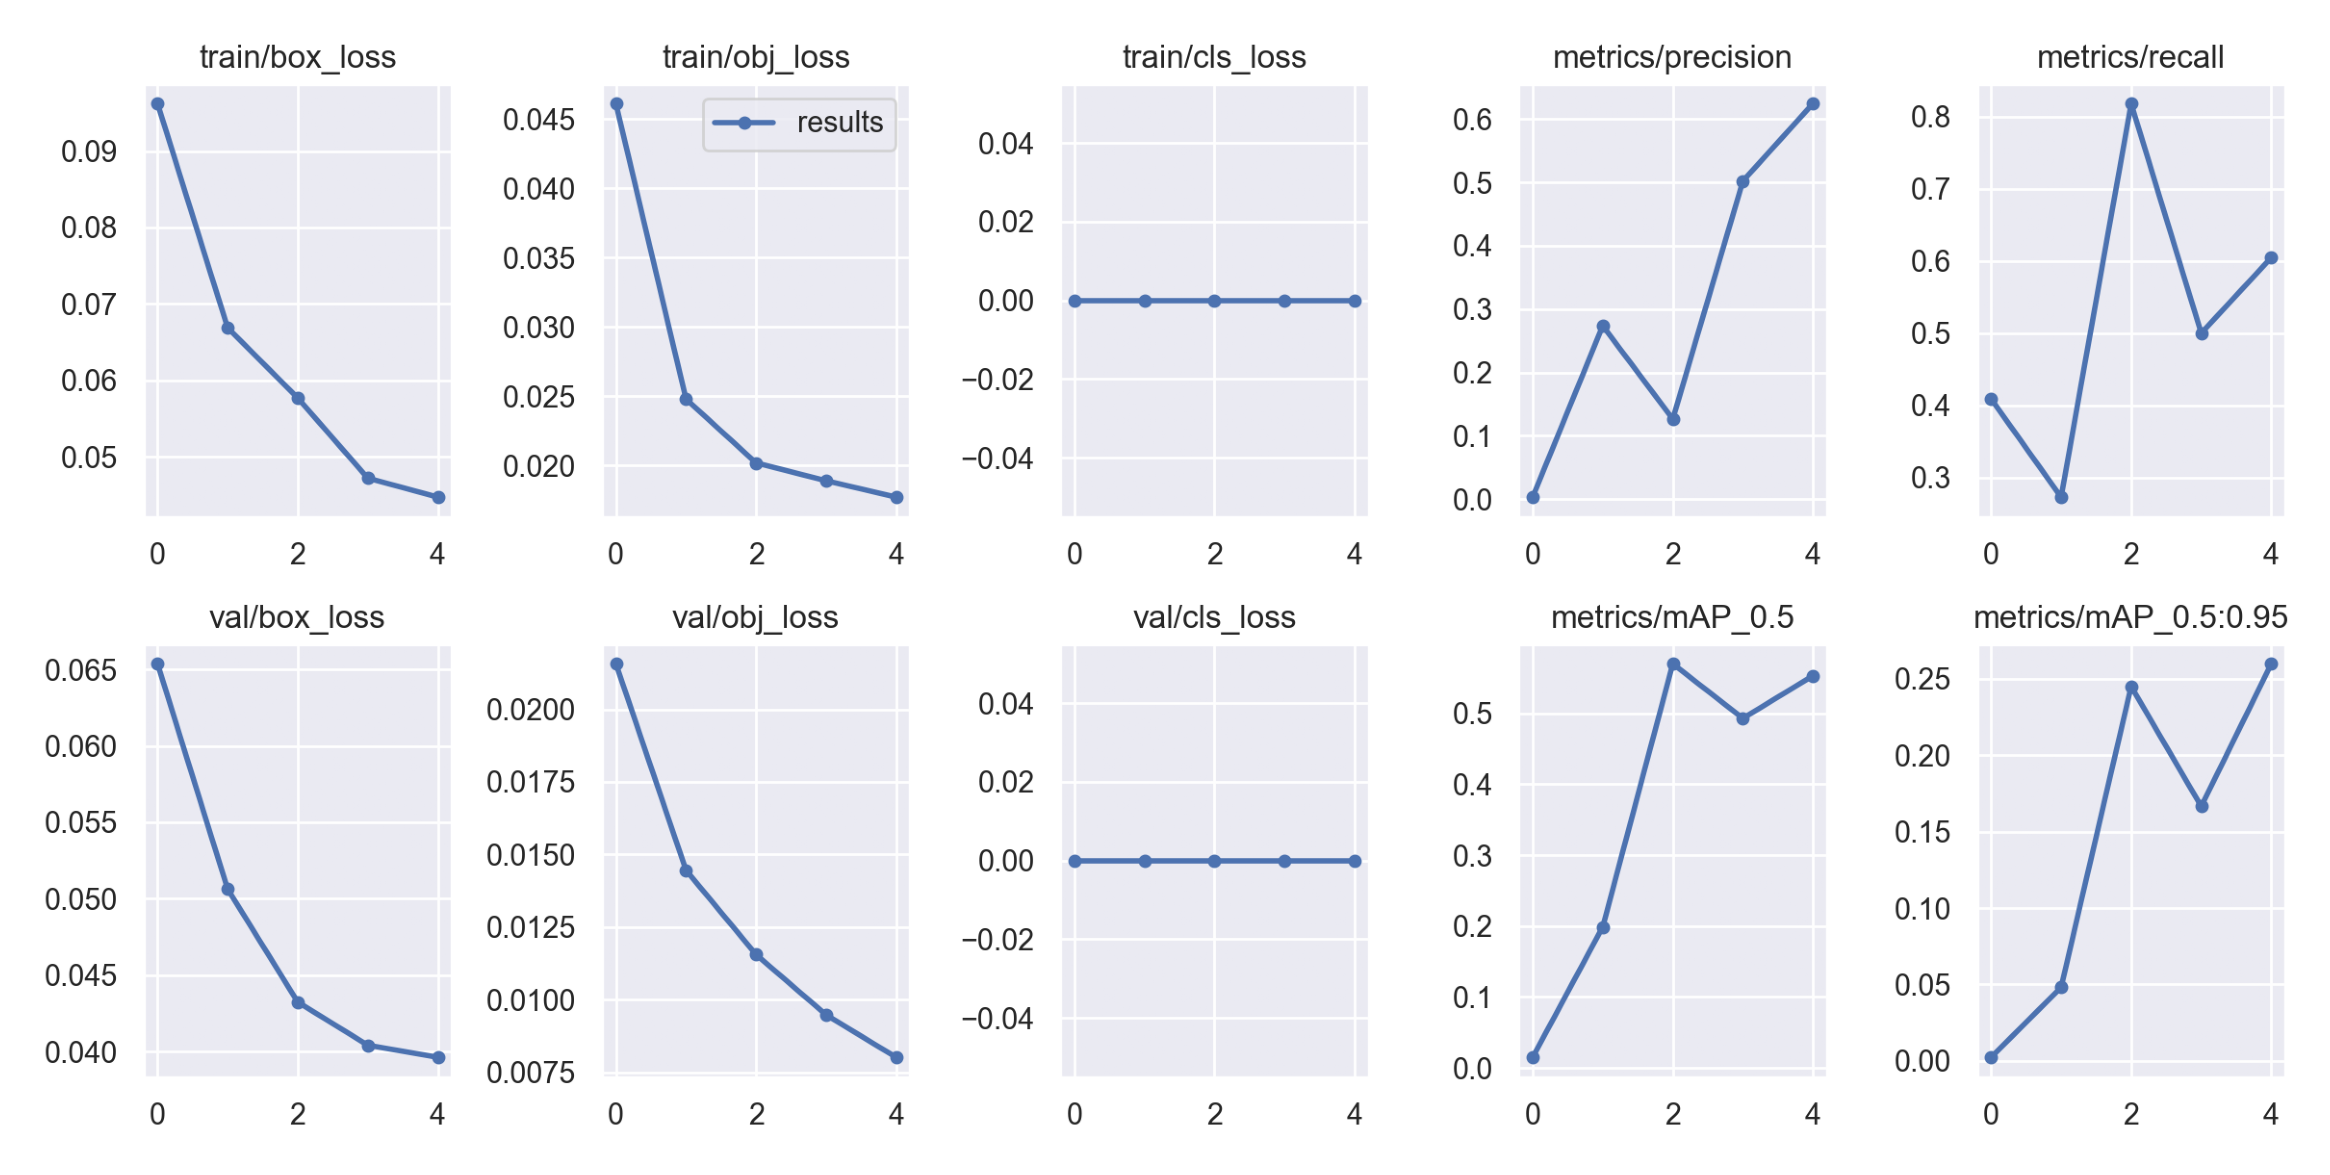

In [4]:
plt.figure(figsize=(30, 15))
plt.axis("off")
plt.imshow(plt.imread("../yolo/yolov5/runs/train/exp4/results.png"))

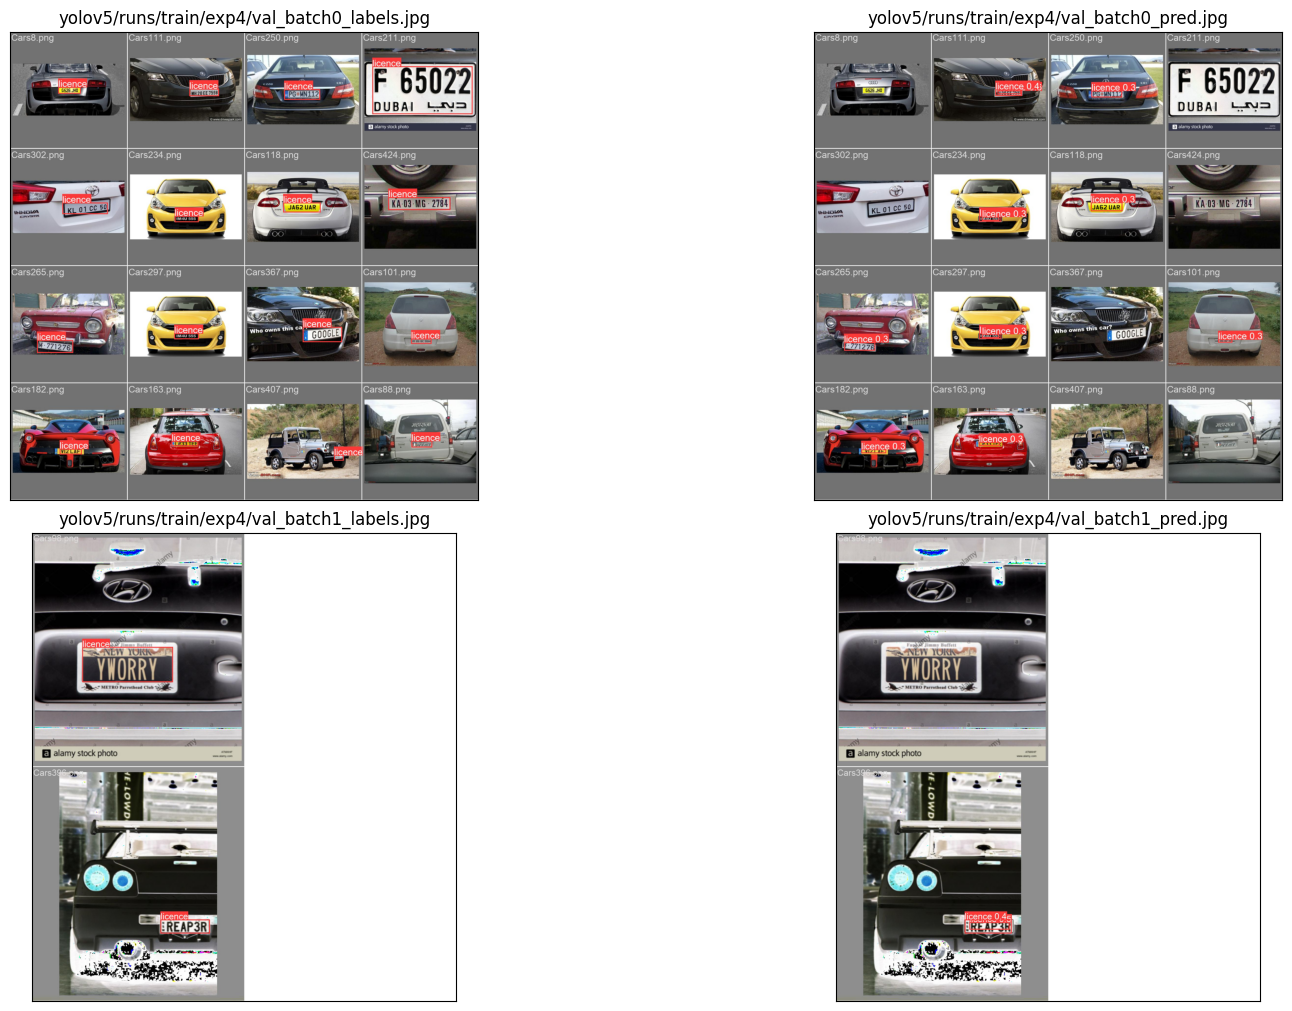

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(2 * 8, 2 * 5), constrained_layout=True)
for row in range(2):
    ax[row][0].imshow(plt.imread(f"yolov5/runs/train/exp4/val_batch{row}_labels.jpg"))
    ax[row][0].set_xticks([])
    ax[row][0].set_yticks([])
    ax[row][0].set_title(
        f"yolov5/runs/train/exp4/val_batch{row}_labels.jpg", fontsize=12
    )

    ax[row][1].imshow(plt.imread(f"yolov5/runs/train/exp4/val_batch{row}_pred.jpg"))
    ax[row][1].set_xticks([])
    ax[row][1].set_yticks([])
    ax[row][1].set_title(f"yolov5/runs/train/exp4/val_batch{row}_pred.jpg", fontsize=12)
plt.show()

In [2]:
CKPT_PATH = "yolov5/runs/train/exp4/weights/best.pt"
yolov5 = torch.hub.load(
    "yolov5", "custom", path=CKPT_PATH, source="local", force_reload=True
)

"confidence: " + str(yolov5.conf)

YOLOv5  v7.0-168-gec2b853 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 


requirements: C:\Users\Julia\PycharmProjects\yolo\venv\Lib\site-packages\requirements.txt not found, check failed.


Model summary: 276 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


'confidence: 0.25'

In [ ]:
import pandas as pd

imgs = os.listdir("images")

pred_df = pd.DataFrame()
for pth in imgs:
    img = Image.open("images/" + pth).convert("RGB")
    img = np.asarray(img)
    pred = yolov5(img, size=1280, augment=False)
    for i, row in pred.pandas().xyxy[0].iterrows():
        if row["confidence"] < yolov5.conf:
            break
        row["path"] = pth
        pred_df = pred_df.loc[len(pred_df)] = row
#         pred_df = pred_df.concat(row, ignore_index=True)
pred_df = pred_df.reset_index()
pred_df

In [ ]:
imgs = os.listdir("images")

pred_df = pd.DataFrame()
for pth in imgs:
    img = Image.open("images/" + pth).convert("RGB")
    img = np.asarray(img)
    pred = yolov5(img, size=1280, augment=False)
    for i, row in pred.pandas().xyxy[0].iterrows():
        if row["confidence"] < yolov5.conf:
            break
        row["path"] = pth
        pred_df = pred_df.append(row)
pred_df = pred_df.reset_index()

In [ ]:
import pytesseract

for i, row in pred_df.iterrows():
    img = "/kaggle/input/car-plate-detection/images/" + row["path"]
    img = Image.open(img).convert("RGB")
    img = np.asarray(img)
    img_cropped = img[
        int(row["ymin"]) : int(row["ymax"]), int(row["xmin"]) : int(row["xmax"])
    ]
    text = pytesseract.image_to_string(img_cropped)
    pred_df.loc[i, "text_detected"] = text